In [1]:
try:
    from tqdm import tqdm
except ImportError:
    def tqdm(iterator, *args, **kwargs):
        return iterator
    
import numpy as np
import scipy as sp
from scipy import constants
from pylab import *
import joblib


import os,sys
from importlib import reload
import copy
sys.path.append("../tracker")

In [2]:
import KalmanFilter as KF
import KalmanUtils as KU
import TrackFinder as TF
import kf_debug as debug
import DataTypes

reload(KF)
reload(KU)
reload(debug)

<module 'kf_debug' from '../tracker\\kf_debug.py'>

In [58]:
hits=joblib.load("hits_example.joblib")
hits[:10]

[Hit(x=-1367.930157451511, y=9894.0, z=12258.75, t=28.83707486037498, x_err=14.132352000025548, y_err=0, z_err=1.299038105676658, t_err=1, layer=2, ind=0),
 Hit(x=-1425.75, y=9975.599999999999, z=12289.609992612579, t=32.7121659864858, x_err=1.299038105676658, y_err=0, z_err=14.132352000025548, t_err=1, layer=3, ind=1),
 Hit(x=-1474.4232743885982, y=10057.2, z=12371.25, t=35.75012318055435, x_err=14.132352000025548, y_err=0, z_err=1.299038105676658, t_err=1, layer=4, ind=2),
 Hit(x=-1547.25, y=10138.8, z=12449.5, t=39.77170285902949, x_err=1.299038105676658, y_err=0, z_err=14.132352000025548, t_err=1, layer=5, ind=3),
 Hit(x=-1409.1042990209041, y=9894.0, z=12875.25, t=39.4651298098953, x_err=14.132352000025548, y_err=0, z_err=1.299038105676658, t_err=1, layer=2, ind=4),
 Hit(x=-1434.75, y=9975.599999999999, z=13003.53125079586, t=47.35979085661327, x_err=1.299038105676658, y_err=0, z_err=14.132352000025548, t_err=1, layer=3, ind=5),
 Hit(x=-1499.5, y=10057.2, z=13159.75, t=52.89537872

In [64]:
tf = TF.TrackFinder(method="recursive", debug=True)
# tf = TF.TrackFinder(method="greedy", debug=True)
# %timeit -n 3 tf.run(hits)
tracks = tf.run(hits)
    

In [60]:
print(len(tracks))
# tracks

19


In [61]:
steel_height=0.03 #m
Box_IP_Depth=85.47#m
def coord_det2sim(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is m
    """
    return np.array([vector_xyz[0]+119.5, vector_xyz[1], -vector_xyz[2]-steel_height])
def coord_sim2cms(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is cm
    """
    return np.array([vector_xyz[1],      -vector_xyz[2]+Box_IP_Depth, vector_xyz[0]])*100 # turn to cm
def coord_det2cms(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is cm
    """    
    return coord_sim2cms(coord_det2sim(vector_xyz))

def coord_sim2det(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is m
    return: transformed (x',y',z'), unit is m
    """    
    return np.array([vector_xyz[0]-119.5, vector_xyz[1], -vector_xyz[2]-steel_height])
def coord_cms2det(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is cm
    return: transformed (x',y',z'), unit is m
    """    
    return coord_sim2det(coord_cms2sim(vector_xyz))

def coord_cms2sim(vector_xyz):
    """
    input: vector_xyz = (x,y,z), unit is cm
    return: transformed (x',y',z'), unit is m
    """    
    return np.array([vector_xyz[2],      vector_xyz[0], -vector_xyz[1]+Box_IP_Depth*100])/100 # turn to m    
    

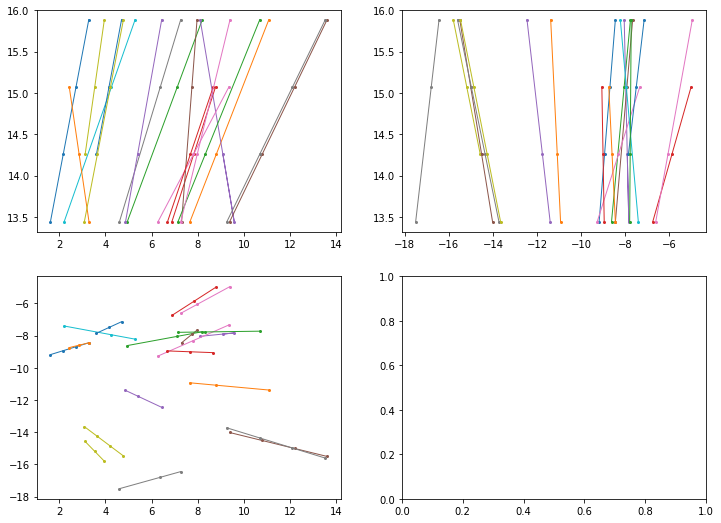

In [63]:
fig,axs=plt.subplots(2,2,figsize=(12,9))
axs=axs.flatten().tolist()

# Plot tracks
for track in tracks:
    # Each track is a list of each point is [x,y,z,t, PID, Energy, TRACK_ID]
    x,y,z = coord_cms2det(np.array(track.hits_filtered).T)        
    track_label = ""#pdg_name(pid)
    axs[0].plot(x, z,marker=".",linewidth=1,markersize=4,label=track_label)
    axs[1].plot(y, z,marker=".",linewidth=1,markersize=4,label=track_label)
    axs[2].plot(x, y,marker=".",linewidth=1,markersize=4,label=track_label)

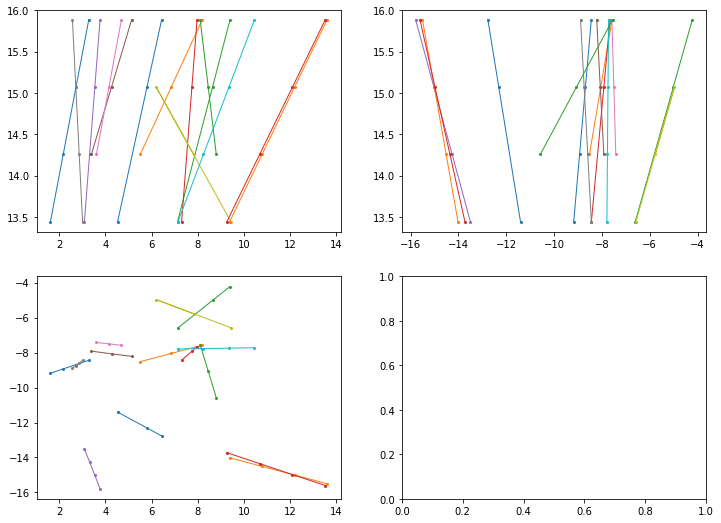

In [65]:
fig,axs=plt.subplots(2,2,figsize=(12,9))
axs=axs.flatten().tolist()

# Plot tracks
for track in tracks:
    # Each track is a list of each point is [x,y,z,t, PID, Energy, TRACK_ID]
    x,y,z = coord_cms2det(np.array(track.hits_filtered).T)        
    track_label = ""#pdg_name(pid)
    axs[0].plot(x, z,marker=".",linewidth=1,markersize=4,label=track_label)
    axs[1].plot(y, z,marker=".",linewidth=1,markersize=4,label=track_label)
    axs[2].plot(x, y,marker=".",linewidth=1,markersize=4,label=track_label)